# Week 10 Independent Lab
### BGEN 632 | University of Montana MSBA Program
### Alex McKenzie | May 8, 2025

In [3]:
!pip install graphviz
!pip install pydotplus

# load modules
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# for displaying the tree
import graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

  Preparing metadata (setup.py) ... one
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24551 sha256=2427f590e7af753996b19f47a1019e32c0b274df2018b8e165fc56969b813b51
  Stored in directory: /Users/AlexMcKenzie/Library/Caches/pip/wheels/77/54/7c/c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


In [4]:
# set working directory
os.chdir("/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week10labs/data")
os.getcwd()

'/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week10labs/data'

In [8]:
# load data
hosp_df = pd.read_table("calihospital.txt", sep = '\t')

hosp_df

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,www.scrippshealth.org,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,...,530,411280,Manin,Emily,F,1,Regional Representative,46978,4,1/1/2011
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,www.memorialcare.org,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,...,462,310431,Dong,HongWei,F,4,Safety Inspection Member,23987,2,1/1/2012
58,22460,Stanford Hospital & Clinics,94305,stanfordhospital.org,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,...,445,380668,Smith,Mary,F,4,Safety Inspection Member,23987,2,1/1/2012
59,33192,California Pacific Medical Center - Pacific Ca...,94115,www.cpmc.org,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,...,730,308150,Fourier,Craig,M,1,Regional Representative,46978,4,1/1/2011


In [6]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

In [10]:
# generate a correlation matrix:

numerical_df = (hosp_df
                .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'])
               )

numerical_df.corr()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
NoFTE,1.000000,0.903827,0.938051,0.880295,0.896387,-0.072314,0.881333
NetPatRev,0.903827,1.000000,0.979109,0.960232,0.998765,0.220149,0.887727
InOperExp,0.938051,0.979109,1.000000,0.935863,0.979817,0.071781,0.925521
OutOperExp,0.880295,0.960232,0.935863,1.000000,0.955239,0.056218,0.826892
OperRev,0.896387,0.998765,0.979817,0.955239,1.000000,0.234270,0.890018
OperInc,-0.072314,0.220149,0.071781,0.056218,0.234270,1.000000,0.041857
AvlBeds,0.881333,0.887727,0.925521,0.826892,0.890018,0.041857,1.000000


## Target Variable:  
#### Operating Income (OperInc)  
#### Operating Revenue (OperRev)  
#### TypeControl (TypeControl)  
#### DonorType (DonorType)  

## Numerical Predictors:  
#### NetPatRev, NoFTE  
#### NoFTE, AvlBeds  
#### NetPatRev, AvlBeds  
#### NetPatRev, Compensation  

## Categorical Predictors:  
#### Teaching  
#### TypeControl  
#### Teaching  
#### TypeControl  


## Create decision trees

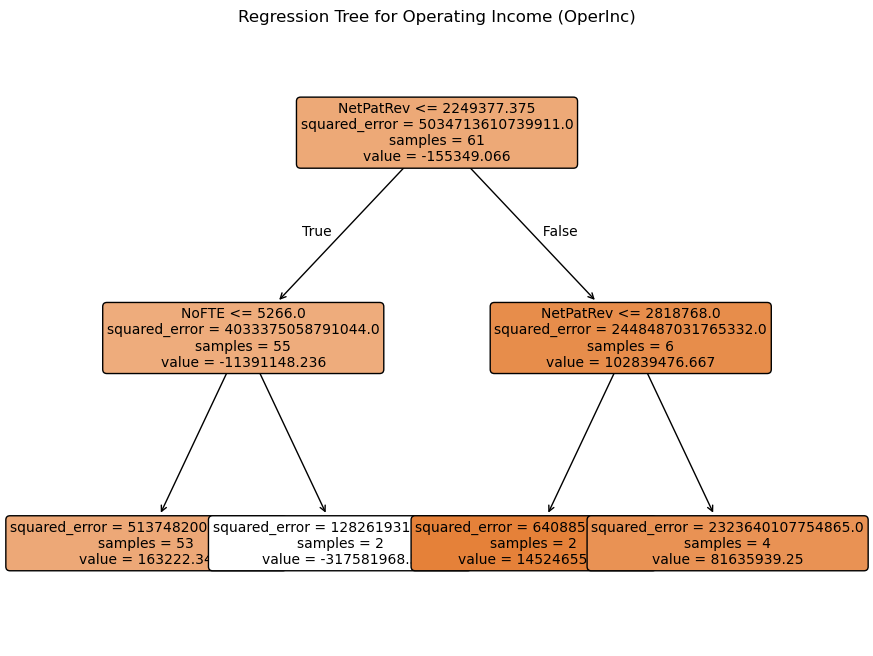

In [12]:
# Using Operating Income as a target variable

# subset numerical variables
hosp_sub_operinc = (hosp_df
                    .filter(['NetPatRev', 'NoFTE'])
                   )

# subset categorical variable
hosp_dummy_operinc = (hosp_df
                      .filter(['Teaching'])
                     )

# convert categorical variable into dummy/indicator variables
dummies_operinc = pd.get_dummies(hosp_dummy_operinc, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_operinc = pd.merge(hosp_sub_operinc, dummies_operinc, left_index=True, right_index=True)

# create the regression tree
tree_operinc = tree.DecisionTreeRegressor(max_depth=2, random_state=0).fit(tree_data_operinc, hosp_df['OperInc'])

# create labels for plot
col_names_operinc = list(tree_data_operinc.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_operinc, feature_names=col_names_operinc, filled=True, rounded=True, fontsize=10)
plt.title('Regression Tree for Operating Income (OperInc)')
plt.show()


### Interpretation: Regression Tree for Operating Income

The decision tree splits first on Net Patient Revenue, indicating it's the most influential predictor for Operating Income. The split differentiates hospitals by their scale of patient revenue:

- **Hospitals with Net Patient Revenue ≤ \$2,249,377** typically have lower Operating Income.
  - A secondary split occurs based on **Number of Full-Time Equivalents**:
    - Hospitals with fewer employees (NoFTE ≤ 5,266) tend to have slightly positive Operating Income on average (\$163,222).
    - Hospitals with larger numbers of employees have significantly negative Operating Income on average (-\$31,758,968), suggesting potential inefficiencies or higher operational costs.

- **Hospitals with Net Patient Revenue > \$2,249,377** exhibit substantially higher Operating Income on average (\$10,283,947).
  - A secondary split further segments this group:
    - Those with moderate revenue (≤ \$2,818,768) have average Operating Income around \$1,452,465.
    - Those with very high revenue (> \$2,818,768) enjoy significantly greater Operating Income (~\$81,635,939), clearly aligning higher patient revenue with dramatically improved financial performance.

These splits make logical sense as hospitals generating greater revenue generally have greater resources and operational scale, leading directly to higher Operating Income, impacting financial outcomes.


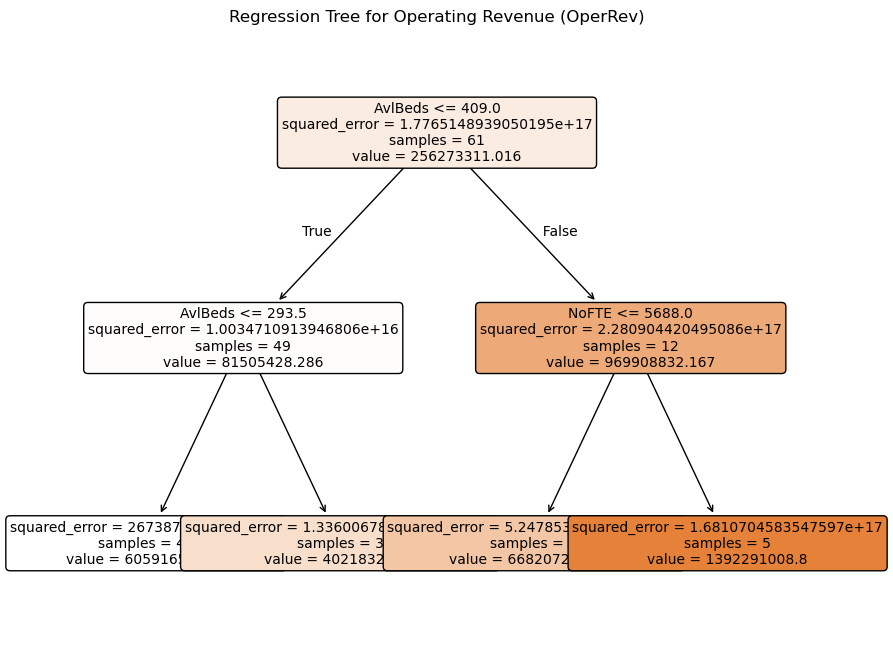

In [13]:
# Using Operating Revenue as a target variable

# subset numerical variables
hosp_sub_operrev = (hosp_df
                    .filter(['NoFTE', 'AvlBeds'])
                   )

# subset categorical variable
hosp_dummy_operrev = (hosp_df
                      .filter(['TypeControl'])
                     )

# convert categorical variable into dummy/indicator variables
dummies_operrev = pd.get_dummies(hosp_dummy_operrev, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_operrev = pd.merge(hosp_sub_operrev, dummies_operrev, left_index=True, right_index=True)

# create the tree
tree_operrev = tree.DecisionTreeRegressor(max_depth=2, random_state=0).fit(tree_data_operrev, hosp_df['OperRev'])

# create labels for plot
col_names_operrev = list(tree_data_operrev.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_operrev, feature_names=col_names_operrev, filled=True, rounded=True, fontsize=10)
plt.title('Regression Tree for Operating Revenue (OperRev)')
plt.show()


### Interpretation: Regression Tree for Operating Revenue

This decision tree splits first on Available Beds, showing it as a key determinant of Operating Revenue:

- **Hospitals with ≤ 409 available beds** generally have lower Operating Revenue (average: \$8,150,428):
  - Within this group, hospitals with even fewer beds (≤ 293.5) have substantially lower revenue (\$6,059,162), clearly reflecting their smaller operational scale.
  - Hospitals with a slightly higher number of beds (> 293.5 and ≤ 409) generate significantly higher revenue (\$40,218,320), suggesting this bed count may reflect a critical operational size threshold enhancing revenue.

- **Hospitals with > 409 available beds** have markedly higher Operating Revenue (average: \$96,990,832):
  - A secondary split occurs based on the number of Full-Time Equivalents (**NoFTE**):
    - Hospitals with ≤ 5,688 employees have moderate Operating Revenue (\$66,820,720).
    - Larger hospitals with more employees (> 5,688) generate significantly greater Operating Revenue (\$1,392,291,008), reflecting economies of scale and operational magnitude clearly tied to employee count.

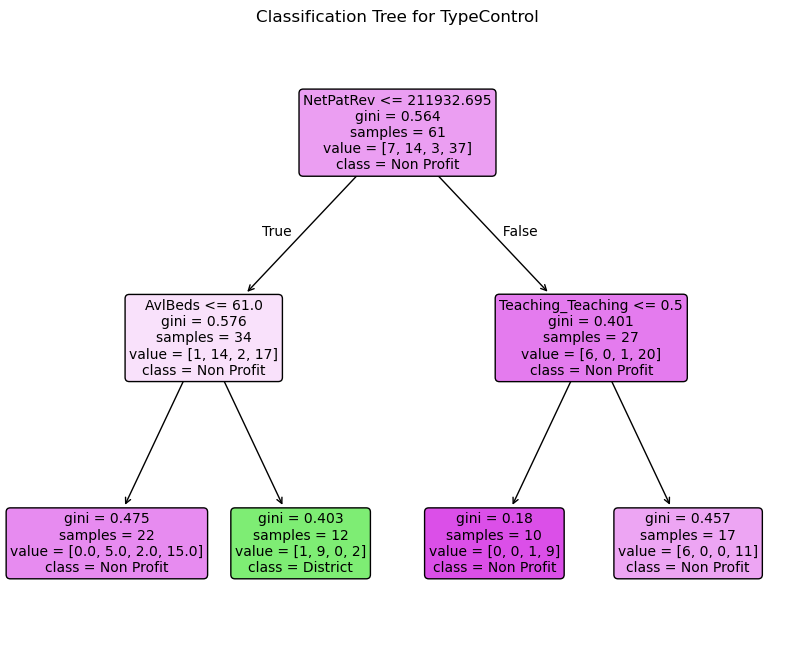

In [16]:
# Using TypeControl as a target variable

# subset numerical variables
hosp_sub_typecontrol = (hosp_df
                        .filter(['NetPatRev', 'AvlBeds'])
                       )

# subset categorical variable
hosp_dummy_typecontrol = (hosp_df
                          .filter(['Teaching'])
                         )

# convert categorical variable into dummy/indicator variables
dummies_typecontrol = pd.get_dummies(hosp_dummy_typecontrol, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_typecontrol = pd.merge(hosp_sub_typecontrol, dummies_typecontrol, left_index=True, right_index=True)

# create the tree - note this is a CLASSIFICATION tree
tree_typecontrol = tree.DecisionTreeClassifier(max_depth=2, random_state=0).fit(tree_data_typecontrol, hosp_df['TypeControl'])

# create labels for plot
col_names_typecontrol = list(tree_data_typecontrol.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_typecontrol, feature_names=col_names_typecontrol, class_names=tree_typecontrol.classes_, filled=True, rounded=True, fontsize=10)
plt.title('Classification Tree for TypeControl')
plt.show()


### Interpretation: Classification Tree for TypeControl

The classification tree first splits on **Net Patient Revenue**, indicating this is a key factor in determining a hospital's type of control (e.g., Non-Profit, District, Investor-Owned, City/County):

- **Hospitals with lower Net Patient Revenue (≤ \$211,933)** are predominantly classified as Non-Profit, though the classification is mixed:
  - A secondary split based on **Available Beds (AvlBeds)** (≤ 61) further refines this group:
    - Hospitals with fewer beds mostly remain Non-Profit.
    - Hospitals with more beds tend to fall clearly into the "District" category, likely reflecting specific community hospital structures associated with slightly larger facilities.

- **Hospitals with higher Net Patient Revenue (> \$211,933)** show clearer distinctions:
  - The secondary split occurs based on **Teaching Status**:
    - Non-teaching hospitals strongly tend to remain Non-Profit, reflecting standard nonprofit community hospitals without academic affiliations.
    - Teaching hospitals, while still mostly Non-Profit, show some variability, suggesting that academic affiliations may introduce complexities in ownership or funding structures.

These splits reflect how hospital financial resources and institutional characteristics directly relate to organizational structures and control types.

### Note: I was struggling to interpret this last one, and had to ask ChatGPT to clarify. It was here that I (finally?) understood how these graphics work, with the left/right on a splite corresponding to a true/false statement. So in this case, the "District" class of hospitals is implied to include those that are of District type control, but return "false" for the 61 bed threshold; the higher rate of beds is implied -- but not explpcitly stated -- by the graphic.

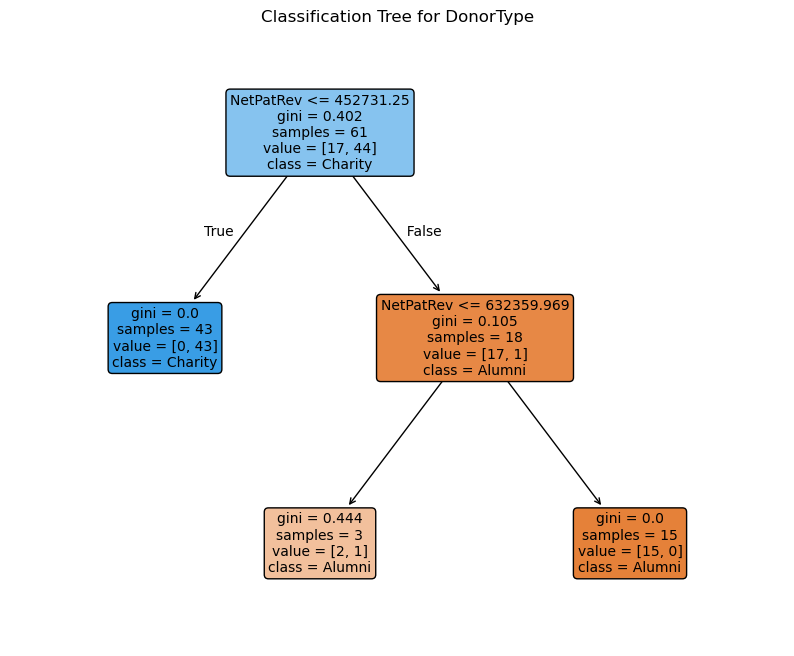

In [17]:
# Using DonorType as a target variable

# subset numerical variables
hosp_sub_donortype = (hosp_df
                      .filter(['NetPatRev', 'Compensation'])
                     )

# subset categorical variable
hosp_dummy_donortype = (hosp_df
                        .filter(['TypeControl'])
                       )

# convert categorical variable into dummy/indicator variables
dummies_donortype = pd.get_dummies(hosp_dummy_donortype, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_donortype = pd.merge(hosp_sub_donortype, dummies_donortype, left_index=True, right_index=True)

# create the tree - note this is a CLASSIFICATION tree
tree_donortype = tree.DecisionTreeClassifier(max_depth=2, random_state=0).fit(tree_data_donortype, hosp_df['DonorType'])

# create labels for plot
col_names_donortype = list(tree_data_donortype.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_donortype, feature_names=col_names_donortype, class_names=tree_donortype.classes_, filled=True, rounded=True, fontsize=10)
plt.title('Classification Tree for DonorType')
plt.show()


### Interpretation: Classification Tree for DonorType

The classification tree splits primarily on **Net Patient Revenue**, clearly distinguishing hospital donor types based on financial scale:

- **Hospitals with lower Net Patient Revenue (≤ \$452,731)** are entirely classified as **Charity-funded**, suggesting smaller hospitals consistently rely on charitable donations.

- **Hospitals with higher Net Patient Revenue (> \$452,731)** primarily receive funding from **Alumni**:
  - Within this group, hospitals with revenue ≤ \$632,360 are mostly Alumni-funded but have some minor mixing (Gini = 0.105), reflecting slight variability in donor type.
    - The larger subset (15 samples) with even higher revenue remains purely Alumni-funded (Gini = 0.0), clearly indicating alumni donor support as dominant among financially robust institutions.

This tree makes intuitive sense: smaller hospitals often rely on charitable contributions, while larger hospitals, particularly those associated with higher revenues, are more likely to leverage their alumni networks for funding support.

### Final Subjective Assessment of Tree Models

Your instructions as us to choose the "best" model, and I suppose it depends on the hypothetical goal:

1. Were I trying to inform **public policy and related spending**, I would refer to the **TypeControl** model, using the data and relevant context to articulate an argument for either non-profit or district-funded status (as driven by the projected demand for beds relative to the area population).  

2. Were I an **investor weighing a potential capital allocation**, I would refer to **both** the **Operating Income** and **Operating Revenue** models, and would probably be interested in whether or not A) our investment target had a reasonable path to achieving ~$10.2M in ARR, and B) whether or not there existed the requisite workforce to support the ~5,688 employees needed to support a high-reveneue enterprise.  

3. Were I launching a **non-profit initiative** aimed at driving impacts in medical workforce, I would refer to the **DonorType** model, and then assess my stakeholder network, to determine whether we wanted to operate as a charity-backed or alumni-sponsored organization.

# References and Notes:

I used ChatGPT to complete this assignment:

https://drive.google.com/file/d/1EebZsfDSv6Y0gEVxOAFkvqGX-fZTe-bK/view?usp=sharing

Due to professional/familial obligation, for the second week in a row I was more or less obligated to let ChatGPT due most of the heavy lifting here. That said -- and simialr to last week -- in reviewing this week's cells, I'm feeling generally comfortable with the *coding* of the cells, and decidedly less comfortable with the statistical underpinnings. To that end, I took time to learn more about the statistical models being deployed here, and to make sure I was fully comprehending what the data was telling me; this is probably best evidenced by the penultimate markdown cell, which is entirely my own interpretation of the analysis.